<a href="https://colab.research.google.com/github/KrushnaTaur/Student-Dropout-Prediction-ML/blob/main/Student_Dropout_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Required Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# 2. Load Dataset

In [ ]:
df = pd.read_csv('student_dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Dataset overview

In [ ]:
df.shape

(4424, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Identify numerical & categorical features

In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
C

MISSING VALUE ANALYSIS

In [ ]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                   

STATISTICAL SUMMARY

In [ ]:
print("Statistical Summary of Numerical Features:")
summary = df[num_features].describe().T
summary["variance"] = df[num_features].var()
summary["skewness"] = df[num_features].skew()
summary["kurtosis"] = df[num_features].kurt()
display(summary)

Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000,3.669294e-01,4.399764,21.482639
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000,3.057141e+02,0.393036,-1.453806
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000,1.726052e+00,1.881050,2.651289
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000,4.258306e+06,-3.809135,13.199149
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000,9.727954e-02,-2.507238,4.288179
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000,1.043788e+02,2.871207,6.778166
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000,1.739321e+02,0.312867,0.968258
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000,4.781050e+01,10.703998,135.146206
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000,2.434594e+02,0.001978,-1.692292
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000,2.354110e+02,-0.298697,-1.580592


# 3. Exploratory Data Analysis (EDA)

Pie Chart & Bar Chart of Target Column

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


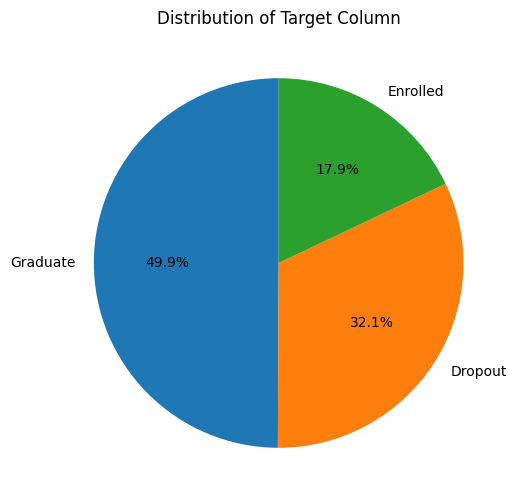

In [ ]:
plt.figure(figsize=(6,6))

df['Target'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=False
)

plt.title('Distribution of Target Column')
plt.ylabel("")     # removes default y-label
plt.show()

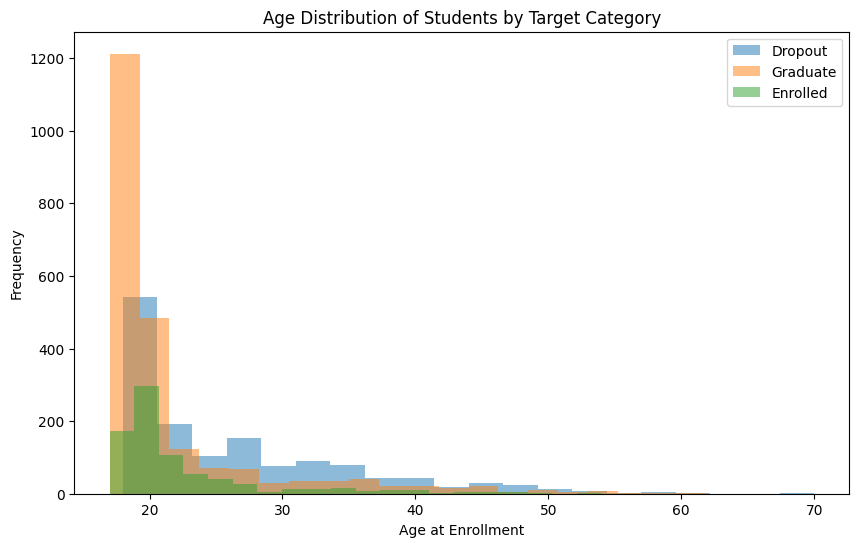

In [ ]:
plt.figure(figsize=(10,6))

for category in df['Target'].unique():
    subset = df[df['Target'] == category]['Age at enrollment']
    plt.hist(subset, bins=20, alpha=0.5, label=category)

plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.title('Age Distribution of Students by Target Category')
plt.legend()
plt.show()

Obsevation: near age 20 there is less chances of dropout as compared to 30.40.50..

<Figure size 800x600 with 0 Axes>

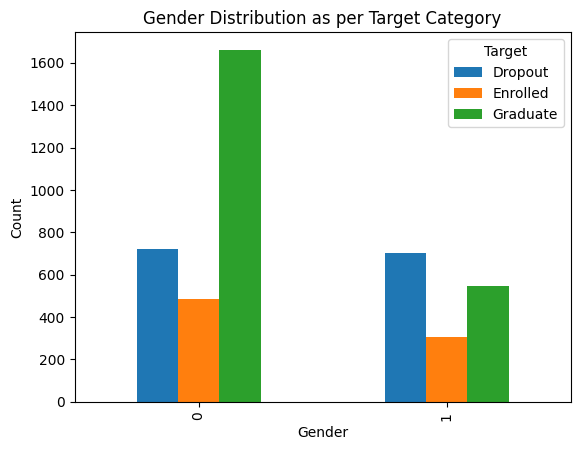

In [ ]:
# Create a cross-tab of Gender vs Target
gender_target = pd.crosstab(df['Gender'], df['Target'])
gender_target

plt.figure(figsize=(8,6))

gender_target.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution as per Target Category')
plt.legend(title='Target')
plt.show()

Obsevation: female dropout ratio high than male

<Figure size 1400x600 with 0 Axes>

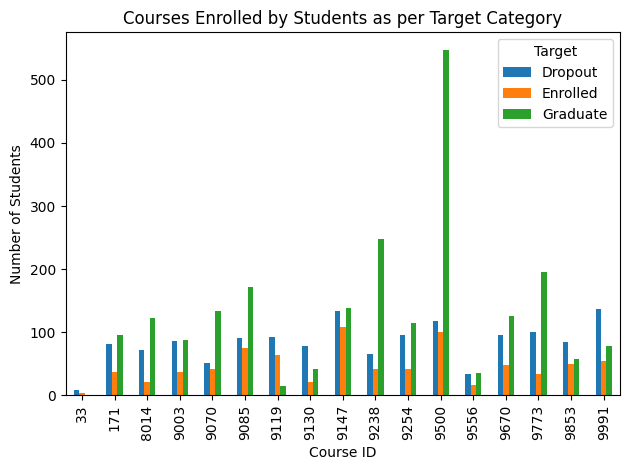

In [ ]:
# Create a table of Course vs Target
course_target = pd.crosstab(df['Course'], df['Target'])
course_target

plt.figure(figsize=(14,6))

course_target.plot(kind='bar')
plt.xlabel('Course ID')
plt.ylabel('Number of Students')
plt.title('Courses Enrolled by Students as per Target Category')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

Obsevation: here we can see which courses has most dropout ratio

<Figure size 1000x600 with 0 Axes>

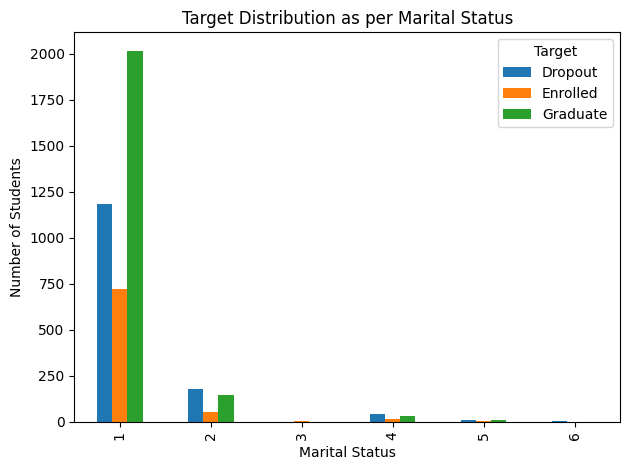

In [ ]:
marital_target = pd.crosstab(df['Marital status'], df['Target'])
marital_target

plt.figure(figsize=(10,6))

marital_target.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.title('Target Distribution as per Marital Status')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

Obsevation: married dropout ratio higher than single

# 4. Data Preparation

In [ ]:
# Remove Target column
df_independent = df.drop(columns=['Target'])

# Select numeric features only
numeric_features = df_independent.select_dtypes(include=['int64', 'float64'])

numeric_features.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


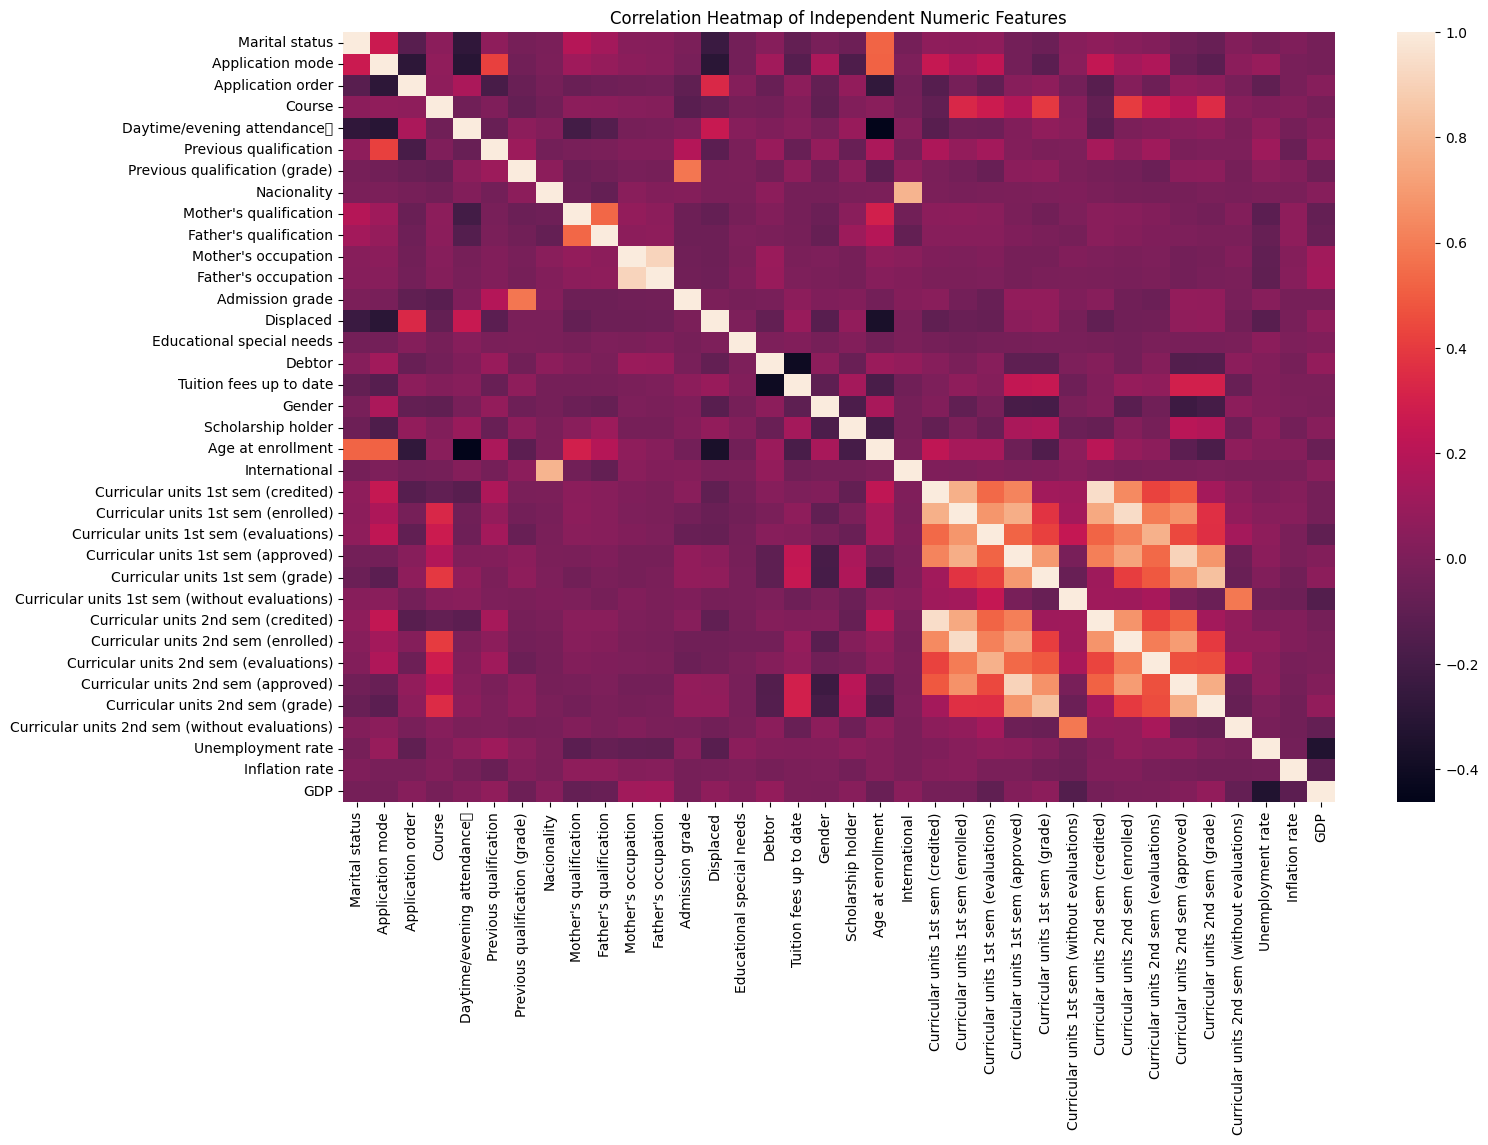

In [ ]:
corr_matrix = numeric_features.corr()
corr_matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=False)
plt.title('Correlation Heatmap of Independent Numeric Features')
plt.show()

observation: we can choose
nationality or international
mothers or fathers qualification
mothers or fathers occupation

as for curricular units 1sem and 2sem, we need to retain this info in dataset without loosing valuable info or risk of model overfitting.

In [ ]:
pca_cols = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

df_pca = df[pca_cols].copy()
df_pca.head()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca_scaled)

df_curricular_pca = pd.DataFrame(
    pca_result,
    columns=['Curricular_PCA1', 'Curricular_PCA2']
)

df_curricular_pca.head()


,Curricular_PCA1,Curricular_PCA2
0,-5.436567,-0.986890
1,0.085205,1.224100
2,-3.589884,-1.621948
3,0.325992,0.884045
4,0.064950,0.867917


In [ ]:
df_final = df.copy()

# Drop original curricular columns
df_final = df_final.drop(columns=pca_cols)

# Add PCA columns
df_final = pd.concat([df_final, df_curricular_pca], axis=1)

df_final.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular_PCA1,Curricular_PCA2
0,1,17,5,171,1,1,122.0,1,19,12,...,1,0,20,0,10.8,1.4,1.74,Dropout,-5.436567,-0.986890
1,1,15,1,9254,1,1,160.0,1,1,3,...,1,0,19,0,13.9,-0.3,0.79,Graduate,0.085205,1.224100
2,1,1,5,9070,1,1,122.0,1,37,37,...,1,0,19,0,10.8,1.4,1.74,Dropout,-3.589884,-1.621948
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,20,0,9.4,-0.8,-3.12,Graduate,0.325992,0.884045
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,45,0,13.9,-0.3,0.79,Graduate,0.064950,0.867917


Now drop unwanted columns

In [ ]:
# Already handled by PCA - remove these
curricular_cols = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

# Your chosen redundant columns to drop
redundant_cols = [
    'International',                  # removing duplicate info of nationality
    'Mother\'s qualification',        # removing one qualification
    'Mother\'s occupation'            # removing one occupation
]

drop_cols = curricular_cols + redundant_cols


In [ ]:
df_final.columns.tolist()


['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target',
 'Curricular_PCA1',
 'Curricular_PCA2']

In [ ]:
# Keep only columns that exist in df_final
drop_cols_filtered = [col for col in drop_cols if col in df_final.columns]

drop_cols_filtered

['International', "Mother's qualification", "Mother's occupation"]

In [ ]:
df_prepared = df_final.drop(columns=drop_cols_filtered)
df_prepared.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Father's qualification,Father's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target,Curricular_PCA1,Curricular_PCA2
0,1,17,5,171,1,1,122.0,1,12,9,...,1,1,0,20,10.8,1.4,1.74,Dropout,-5.436567,-0.986890
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,1,0,19,13.9,-0.3,0.79,Graduate,0.085205,1.224100
2,1,1,5,9070,1,1,122.0,1,37,9,...,0,1,0,19,10.8,1.4,1.74,Dropout,-3.589884,-1.621948
3,1,17,2,9773,1,1,122.0,1,37,3,...,1,0,0,20,9.4,-0.8,-3.12,Graduate,0.325992,0.884045
4,2,39,1,8014,0,1,100.0,1,38,9,...,1,0,0,45,13.9,-0.3,0.79,Graduate,0.064950,0.867917


In [ ]:
df_independent_clean = df_prepared.drop(columns=['Target'])

numeric_clean = df_independent_clean.select_dtypes(include=['int64', 'float64'])

numeric_clean.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Father's qualification,Father's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Curricular_PCA1,Curricular_PCA2
0,1,17,5,171,1,1,122.0,1,12,9,...,0,1,1,0,20,10.8,1.4,1.74,-5.436567,-0.986890
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,0,1,0,19,13.9,-0.3,0.79,0.085205,1.224100
2,1,1,5,9070,1,1,122.0,1,37,9,...,0,0,1,0,19,10.8,1.4,1.74,-3.589884,-1.621948
3,1,17,2,9773,1,1,122.0,1,37,3,...,0,1,0,0,20,9.4,-0.8,-3.12,0.325992,0.884045
4,2,39,1,8014,0,1,100.0,1,38,9,...,0,1,0,0,45,13.9,-0.3,0.79,0.064950,0.867917


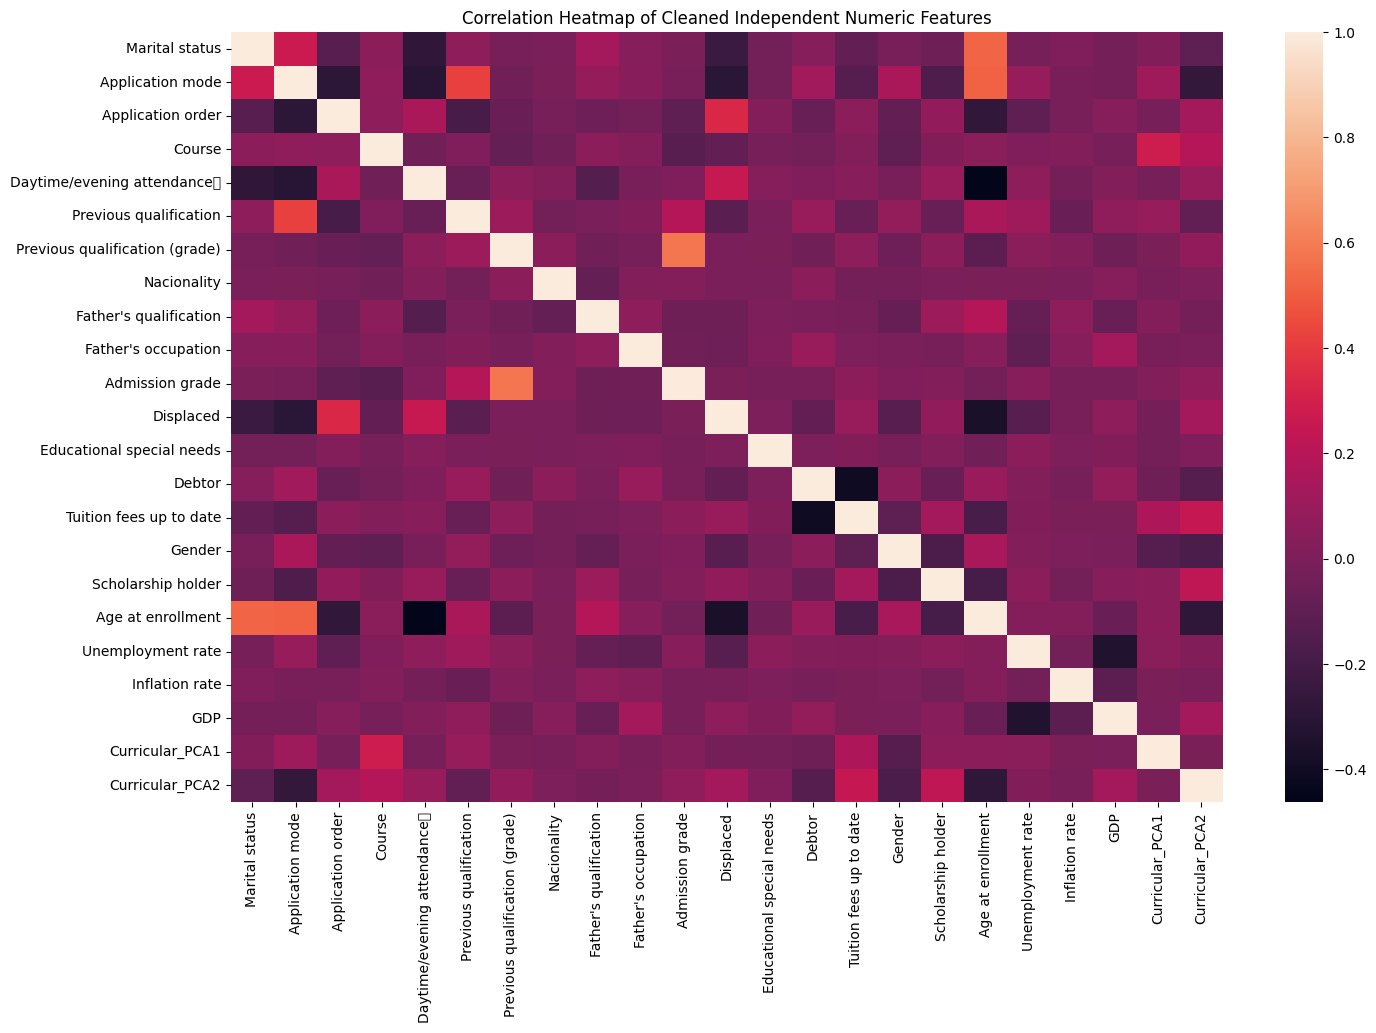

In [ ]:
corr_matrix_clean = numeric_clean.corr()
corr_matrix_clean

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix_clean, annot=False)
plt.title('Correlation Heatmap of Cleaned Independent Numeric Features')
plt.show()

Dropout → 1 (True)

Graduate & Enrolled → 0 (False)

In [ ]:
# Create binary target column
df_prepared['Target'] = df_prepared['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Now Target column is binary AND old values are replaced
df_prepared['Target'].value_counts()

,count
Target,
0,3003
1,1421


Normalizing data

In [ ]:
numeric_cols = df_prepared.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Target']  # remove target
numeric_cols

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_prepared[numeric_cols] = scaler.fit_transform(df_prepared[numeric_cols])

# 5. Encode categorical features + Train-Test Split

Apply OneHotEncoder to categorical features using ColumnTransformer

In [ ]:
# Identify categorical (object / string) columns
categorical_cols = df_prepared.select_dtypes(include=['object']).columns.tolist()

categorical_cols

[]

Train-Test Split data

In [ ]:
from sklearn.model_selection import train_test_split

X = df_prepared.drop(columns=['Target'])
y = df_prepared['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((3318, 23), (1106, 23))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns as they are
)


In [ ]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


final shapes

In [ ]:
X_train_encoded.shape, X_test_encoded.shape


((3318, 23), (1106, 23))

# 6. K-Nearest Neighbors (KNN) model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create & train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_encoded, y_train)

# Predictions
y_pred = knn.predict(X_test_encoded)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.8227848101265823


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[703,  48],
       [148, 207]])

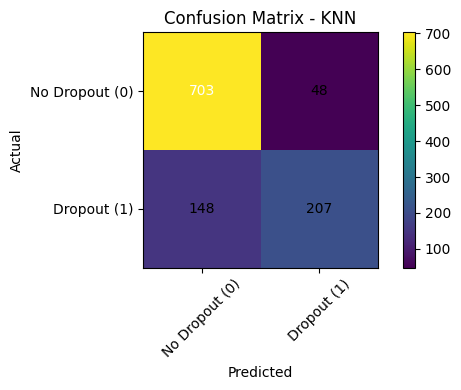

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix - KNN")
plt.colorbar()

classes = ['No Dropout (0)', 'Dropout (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Labeling cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


# 7. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report, roc_auc_score,
    roc_curve
)

# Create model
nb = GaussianNB()

# Fit model
nb.fit(X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded,
       y_train)

# Predictions
y_pred = nb.predict(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)

# Probabilities for ROC curve
y_prob = nb.predict_proba(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)[:, 1]

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.7748643761301989


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[646, 105],
       [144, 211]])

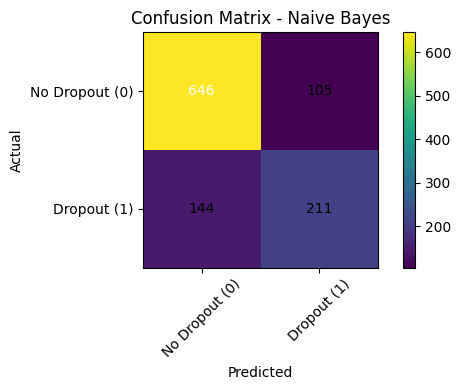

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix - Naive Bayes")
plt.colorbar()

classes = ['No Dropout (0)', 'Dropout (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numbers inside cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       751
           1       0.67      0.59      0.63       355

    accuracy                           0.77      1106
   macro avg       0.74      0.73      0.73      1106
weighted avg       0.77      0.77      0.77      1106



In [ ]:
auc = roc_auc_score(y_test, y_prob)
print("ROC–AUC Score:", auc)

ROC–AUC Score: 0.8372236079593406


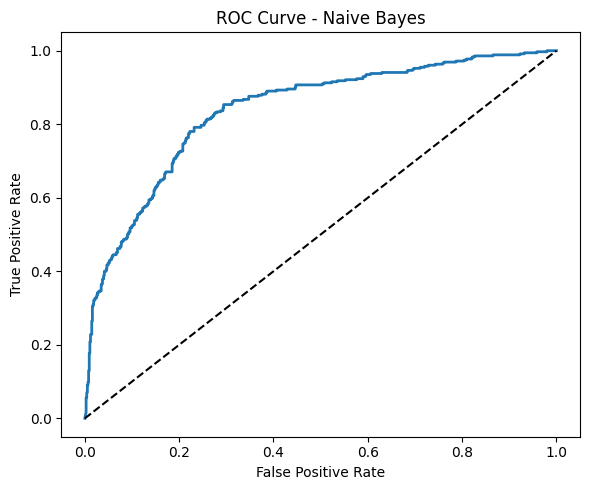

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.tight_layout()
plt.show()

# 8. Decision Tree vs Random Forest Classification

1. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score, roc_curve
)

# Convert sparse matrices if needed
Xtr = X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded
Xte = X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded

dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtr, y_train)

y_pred_dt = dt.predict(Xte)
y_prob_dt = dt.predict_proba(Xte)[:, 1]

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree AUC:", roc_auc_score(y_test, y_prob_dt))

Decision Tree Accuracy: 0.8092224231464737
Decision Tree AUC: 0.7919375105493146


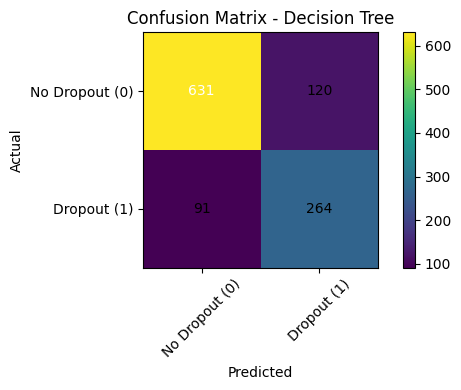

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt
plt.figure(figsize=(6,4))
plt.imshow(cm_dt, interpolation='nearest')
plt.title("Confusion Matrix - Decision Tree")
plt.colorbar()

classes = ['No Dropout (0)', 'Dropout (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_dt.max() / 2
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        plt.text(j, i, cm_dt[i, j], ha="center", va="center",
                 color="white" if cm_dt[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

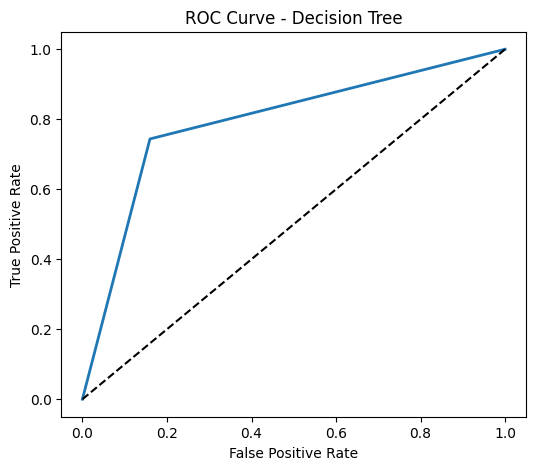

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(Xtr, y_train)

y_pred_rf = rf.predict(Xte)
y_prob_rf = rf.predict_proba(Xte)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Accuracy: 0.8761301989150091
Random Forest AUC: 0.926769940548752


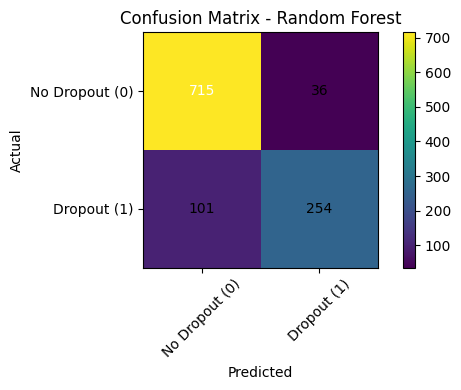

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf
plt.figure(figsize=(6,4))
plt.imshow(cm_rf, interpolation='nearest')
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_rf.max() / 2
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center",
                 color="white" if cm_rf[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

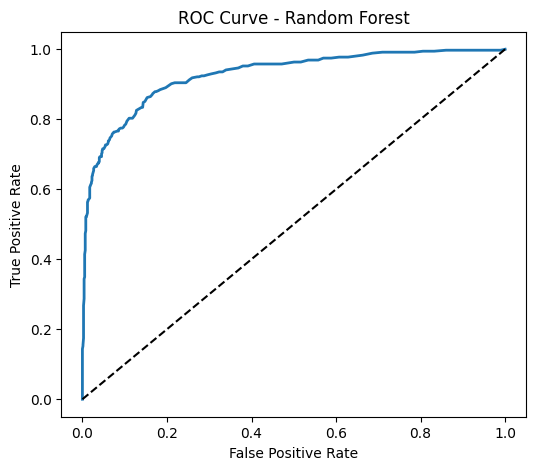

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

3. Cross-Validation (Decision Tree vs Random Forest)

In [ ]:
from sklearn.model_selection import cross_val_score

# Decision Tree CV Accuracy
dt_cv_acc = cross_val_score(dt, Xtr, y_train, cv=5, scoring='accuracy')
# Random Forest CV Accuracy
rf_cv_acc = cross_val_score(rf, Xtr, y_train, cv=5, scoring='accuracy')

# Decision Tree CV AUC
dt_cv_auc = cross_val_score(dt, Xtr, y_train, cv=5, scoring='roc_auc')
# Random Forest CV AUC
rf_cv_auc = cross_val_score(rf, Xtr, y_train, cv=5, scoring='roc_auc')

print("Decision Tree CV Accuracy:", dt_cv_acc.mean())
print("Random Forest CV Accuracy:", rf_cv_acc.mean())

print("Decision Tree CV AUC:", dt_cv_auc.mean())
print("Random Forest CV AUC:", rf_cv_auc.mean())

Decision Tree CV Accuracy: 0.7805952316051536
Random Forest CV Accuracy: 0.8589543695142561
Decision Tree CV AUC: 0.7507065325088614
Random Forest CV AUC: 0.9012235477412393


In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Test Accuracy": [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Test AUC": [roc_auc_score(y_test, y_prob_dt), roc_auc_score(y_test, y_prob_rf)],
    "CV Accuracy (5-fold)": [dt_cv_acc.mean(), rf_cv_acc.mean()],
    "CV AUC (5-fold)": [dt_cv_auc.mean(), rf_cv_auc.mean()]
})

comparison

,Model,Test Accuracy,Test AUC,CV Accuracy (5-fold),CV AUC (5-fold)
0,Decision Tree,0.809222,0.791938,0.780595,0.750707
1,Random Forest,0.876130,0.926770,0.858954,0.901224


# 9. comparison of models

In [ ]:
y_pred_knn = knn.predict(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)
y_prob_knn = knn.predict_proba(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)[:, 1]

y_pred_nb = nb.predict(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)
y_prob_nb = nb.predict_proba(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)[:, 1]

y_pred_dt = dt.predict(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)
y_prob_dt = dt.predict_proba(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)[:, 1]

y_pred_rf = rf.predict(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)
y_prob_rf = rf.predict_proba(X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded)[:, 1]


In [ ]:
model_names = ["KNN", "Naive Bayes", "Decision Tree", "Random Forest"]

accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

aucs = [
    roc_auc_score(y_test, y_prob_knn),
    roc_auc_score(y_test, y_prob_nb),
    roc_auc_score(y_test, y_prob_dt),
    roc_auc_score(y_test, y_prob_rf)
]

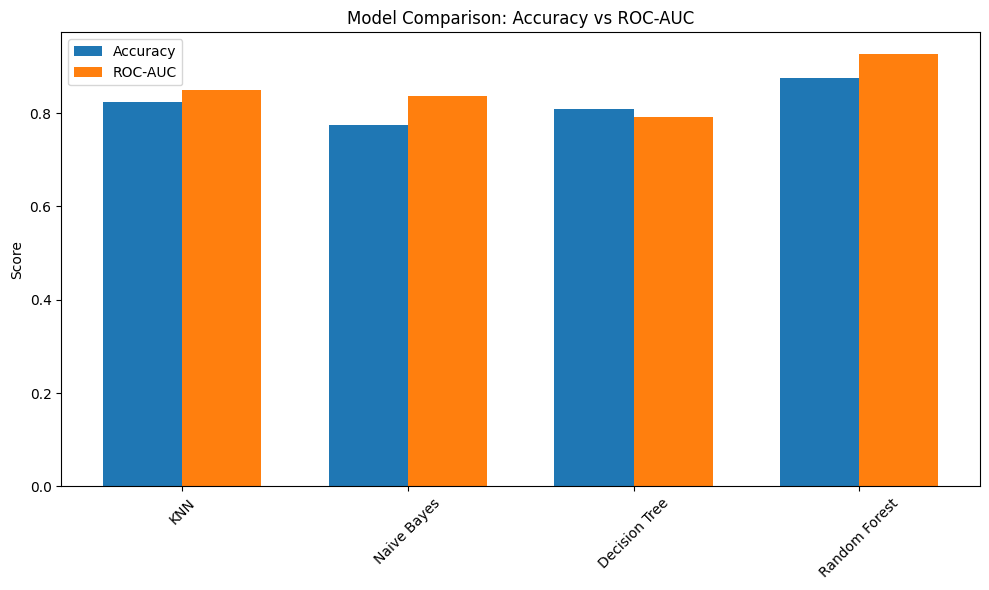

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, aucs, width, label='ROC-AUC')

plt.xticks(x, model_names, rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs ROC-AUC")
plt.legend()
plt.tight_layout()
plt.show()

# 10. Bagging Ensemble Technique

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   # NEW syntax
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

bagging.fit(Xtr, y_train)

y_pred_bag = bagging.predict(Xte)
y_prob_bag = bagging.predict_proba(Xte)[:, 1]


In [ ]:
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Bagging AUC:", roc_auc_score(y_test, y_prob_bag))


Bagging Accuracy: 0.8670886075949367
Bagging AUC: 0.9217906640910711


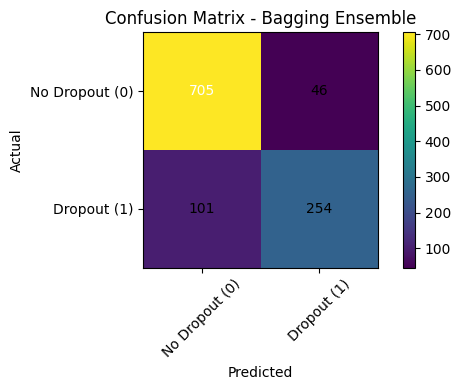

In [ ]:
cm_bag = confusion_matrix(y_test, y_pred_bag)

plt.figure(figsize=(6,4))
plt.imshow(cm_bag, interpolation='nearest')
plt.title("Confusion Matrix - Bagging Ensemble")
plt.colorbar()

classes = ['No Dropout (0)', 'Dropout (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_bag.max() / 2
for i in range(cm_bag.shape[0]):
    for j in range(cm_bag.shape[1]):
        plt.text(j, i, cm_bag[i, j],
                 ha="center", va="center",
                 color="white" if cm_bag[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


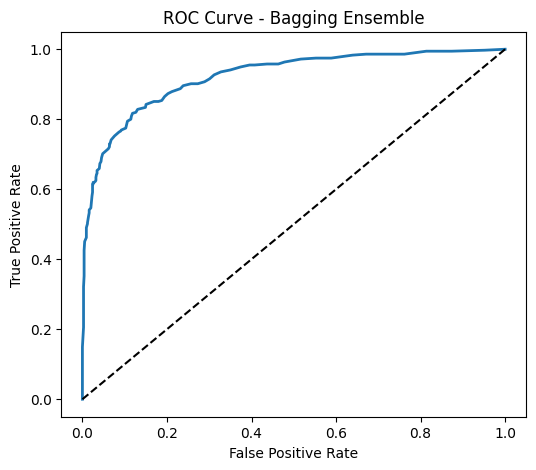

In [ ]:
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_prob_bag)

plt.figure(figsize=(6,5))
plt.plot(fpr_bag, tpr_bag, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging Ensemble")
plt.show()


# 11. Boosting Techniques

In [ ]:
Xtr = X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded
Xte = X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded


1. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve
)

ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

ada.fit(Xtr, y_train)

y_pred_ada = ada.predict(Xte)
y_prob_ada = ada.predict_proba(Xte)[:, 1]

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost AUC:", roc_auc_score(y_test, y_prob_ada))


AdaBoost Accuracy: 0.8725135623869801
AdaBoost AUC: 0.9128298419009397


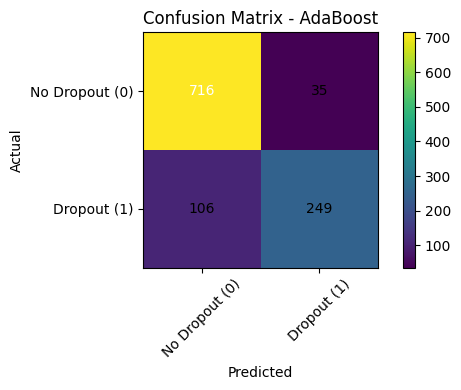

In [ ]:
cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(6,4))
plt.imshow(cm_ada, interpolation='nearest')
plt.title("Confusion Matrix - AdaBoost")
plt.colorbar()

classes = ['No Dropout (0)', 'Dropout (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_ada.max() / 2
for i in range(cm_ada.shape[0]):
    for j in range(cm_ada.shape[1]):
        plt.text(j, i, cm_ada[i, j],
                 ha="center", va="center",
                 color="white" if cm_ada[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


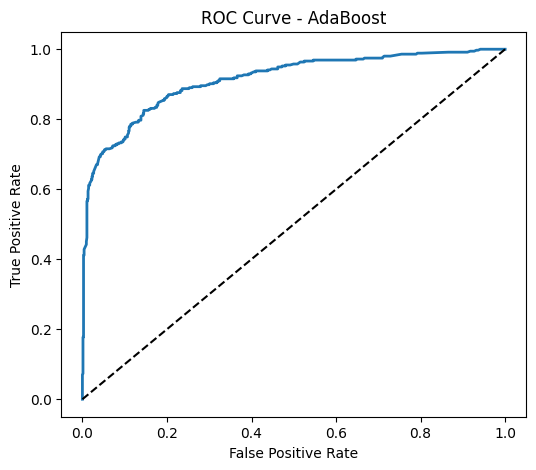

In [ ]:
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)

plt.figure(figsize=(6,5))
plt.plot(fpr_ada, tpr_ada, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.show()


2. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(Xtr, y_train)

y_pred_gb = gb.predict(Xte)
y_prob_gb = gb.predict_proba(Xte)[:, 1]

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting AUC:", roc_auc_score(y_test, y_prob_gb))


Gradient Boosting Accuracy: 0.8743218806509946
Gradient Boosting AUC: 0.9224733219557022


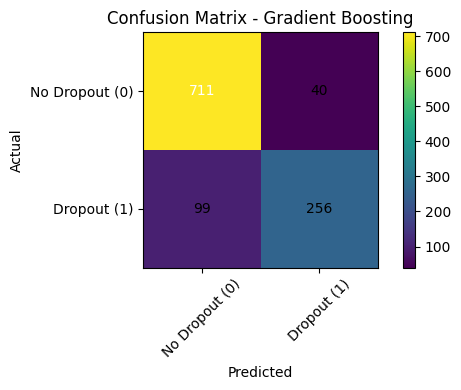

In [ ]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
plt.imshow(cm_gb, interpolation='nearest')
plt.title("Confusion Matrix - Gradient Boosting")
plt.colorbar()

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_gb.max() / 2
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
        plt.text(j, i, cm_gb[i, j],
                 ha="center", va="center",
                 color="white" if cm_gb[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


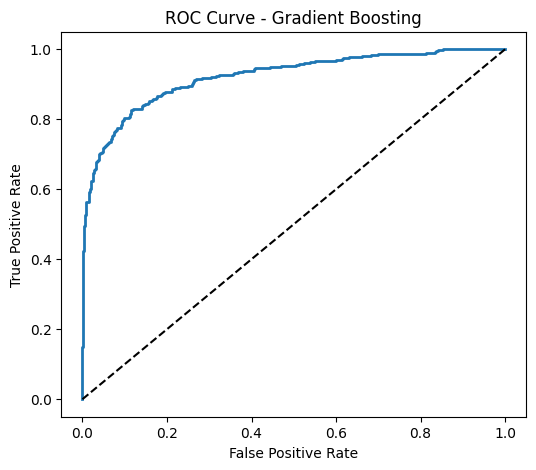

In [ ]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

plt.figure(figsize=(6,5))
plt.plot(fpr_gb, tpr_gb, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.show()


# 12. STACKING ENSEMBLE (combining multiple models)

In [ ]:
Xtr = X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded
Xte = X_test_encoded.toarray() if hasattr(X_test_encoded, "toarray") else X_test_encoded


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Base models (level-0)
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
]

# Meta-model (level-1)
meta_model = LogisticRegression()


In [ ]:
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,        # base model predictions only
    stack_method='predict_proba'
)

stack_model.fit(Xtr, y_train)

y_pred_stack = stack_model.predict(Xte)
y_prob_stack = stack_model.predict_proba(Xte)[:, 1]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking ROC–AUC:", roc_auc_score(y_test, y_prob_stack))


Stacking Accuracy: 0.8725135623869801
Stacking ROC–AUC: 0.9283921906940981


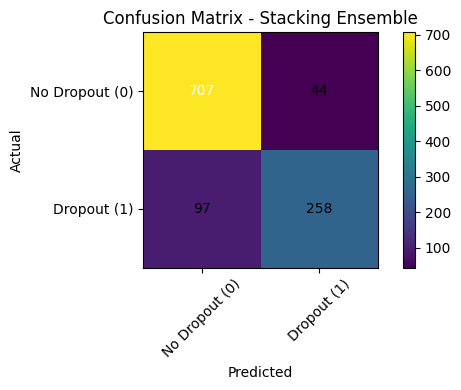

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm_stack = confusion_matrix(y_test, y_pred_stack)

plt.figure(figsize=(6,4))
plt.imshow(cm_stack, interpolation='nearest')
plt.title("Confusion Matrix - Stacking Ensemble")
plt.colorbar()

classes = ['No Dropout (0)', 'Dropout (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_stack.max() / 2
for i in range(cm_stack.shape[0]):
    for j in range(cm_stack.shape[1]):
        plt.text(j, i, cm_stack[i, j],
                 ha="center", va="center",
                 color="white" if cm_stack[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


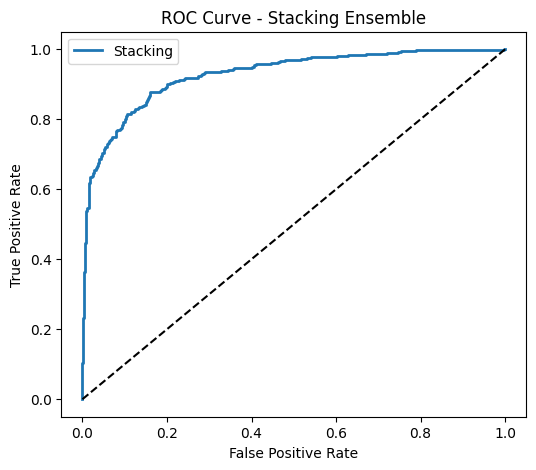

In [ ]:
from sklearn.metrics import roc_curve

fpr_stack, tpr_stack, _ = roc_curve(y_test, y_prob_stack)

plt.figure(figsize=(6,5))
plt.plot(fpr_stack, tpr_stack, linewidth=2, label="Stacking")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stacking Ensemble")
plt.legend()
plt.show()


# 13.comparison table for ALL models

In [ ]:
y_pred_knn, y_prob_knn
y_pred_nb,  y_prob_nb
y_pred_dt,  y_prob_dt
y_pred_rf,  y_prob_rf
y_pred_bag, y_prob_bag
y_pred_ada, y_prob_ada
y_pred_gb,  y_prob_gb
y_pred_stack, y_prob_stack

(array([0, 0, 1, ..., 1, 1, 1]),
 array([0.11961195, 0.11005759, 0.94648576, ..., 0.92744245, 0.84083031,
        0.92220047]))

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

comparison = pd.DataFrame({
    "Model": [
        "KNN",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Bagging Ensemble",
        "AdaBoost",
        "Gradient Boosting",
        "Stacking Ensemble"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_stack)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_knn),
        roc_auc_score(y_test, y_prob_nb),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_bag),
        roc_auc_score(y_test, y_prob_ada),
        roc_auc_score(y_test, y_prob_gb),
        roc_auc_score(y_test, y_prob_stack)
    ]
})

comparison


,Model,Accuracy,ROC-AUC
0,KNN,0.822785,0.850164
1,Naive Bayes,0.774864,0.837224
2,Decision Tree,0.809222,0.791938
3,Random Forest,0.876130,0.926770
4,Bagging Ensemble,0.867089,0.921791
5,AdaBoost,0.872514,0.912830
6,Gradient Boosting,0.874322,0.922473
7,Stacking Ensemble,0.872514,0.928392


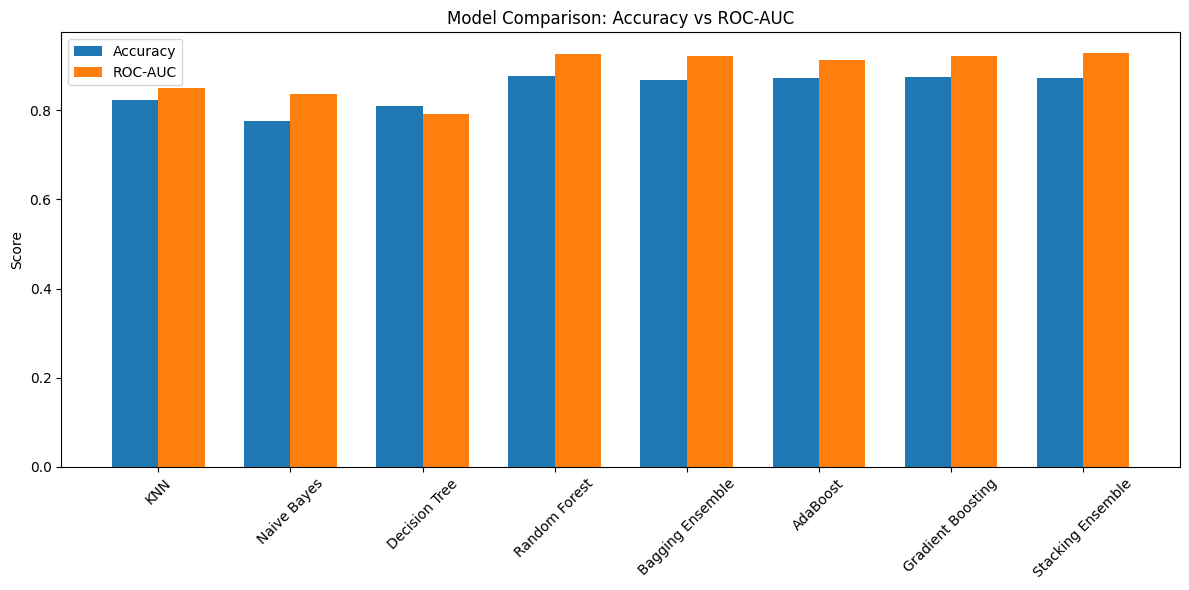

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = comparison["Model"]
accuracies = comparison["Accuracy"]
aucs = comparison["ROC-AUC"]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12,6))

# Accuracy bars
plt.bar(x - width/2, accuracies, width, label="Accuracy")

# AUC bars
plt.bar(x + width/2, aucs, width, label="ROC-AUC")

plt.xticks(x, model_names, rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs ROC-AUC")
plt.legend()
plt.tight_layout()
plt.show()


# 14. FINAL CONCLUSION

# 1. Accuracy & ROC–AUC Performance

Unlike earlier results, the updated performance metrics show realistic and varied predictive strengths across different models:

KNN, Naive Bayes, Decision Tree achieved moderate accuracy (0.77–0.82) and moderate ROC–AUC (0.79–0.85).
These simple models struggle because the dataset contains mixed numerical and categorical data, making them less effective.

Random Forest, Bagging, AdaBoost, Gradient Boosting, and Stacking produced stronger and more stable results, with accuracy between 0.86–0.88 and ROC–AUC between 0.91–0.93.

This reflects a more real-world scenario where no model is perfect, but ensemble techniques greatly improve predictive power.

#2. Insights from Model Performance
🔹 Simple Models

Naive Bayes and KNN showed lower performance due to:

feature distribution differences

high-dimensional transformed data (PCA)

nonlinear relationships in the dataset

🔹 Decision Tree

Good interpretability but prone to overfitting

Lower AUC → Not the best standalone model

🔹 Random Forest

Best performing among individual models:

Accuracy: 0.876

AUC: 0.926

Handles nonlinear patterns very well

More stable than individual Decision Trees

#3. Ensemble Methods Provide the Best Results
✔ Bagging

Accuracy: 0.867

AUC: 0.921

Reduces variance, improves stability

✔ Boosting (AdaBoost & Gradient Boosting)

AdaBoost and Gradient Boosting both performed strongly

Accuracy ~ 0.872–0.874

AUC ~ 0.912–0.922

Boosting improves performance by correcting errors of weaker models

✔ Stacking Ensemble (BEST Overall AUC)

Accuracy: 0.872

Highest AUC: 0.928

Combines multiple models → better generalization

Meta-learner captures patterns learned by base models

Even though RF slightly edges out in accuracy, Stacking has the best ROC-AUC, meaning the best ability to distinguish dropout vs non-dropout.

⭐ Best Performing Model (Recommended for Deployment)
🏆 Stacking Ensemble

Because:

Highest ROC–AUC (0.928)

Combines strengths of KNN, Naive Bayes, Decision Tree & Random Forest

Most balanced and robust performance

Less risk of overfitting

Generalizes better than individual models